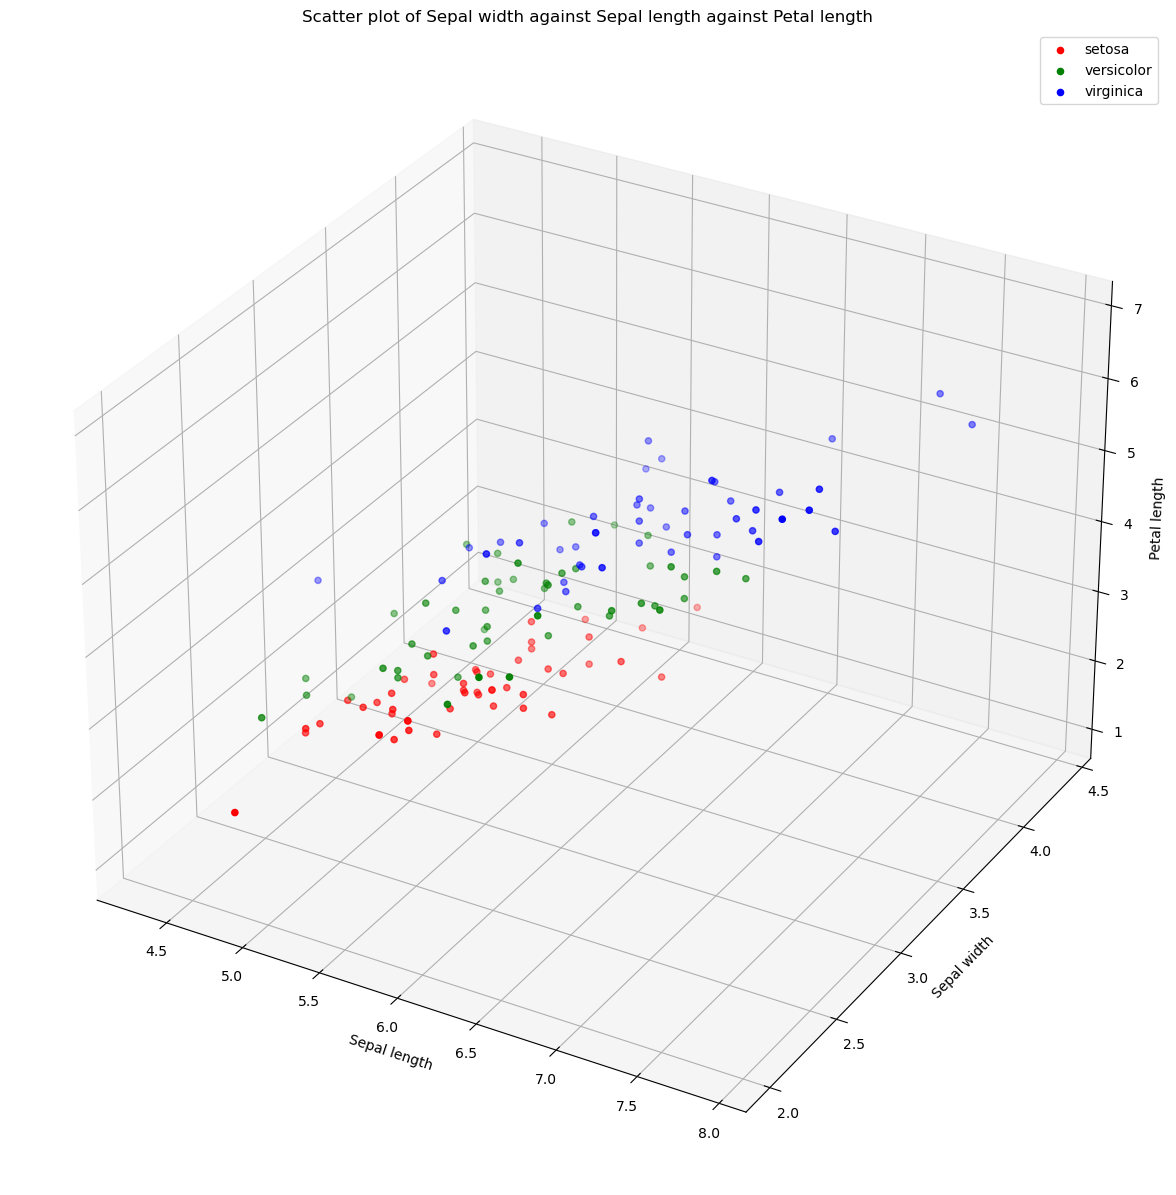

(array([0, 1, 2]), array([50, 49, 51]))
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9466666666666667
0.9466666666666667
0.9533333333333334
0.9400000000000001
0.9533333333333334
0.9533333333333334
0.9466666666666667
0.9400000000000001
0.9400000000000001
0.9400000000000001
0.9466666666666667
0.9466666666666667
0.9400000000000001
0.9333333333333333
0.9266666666666665
0.9266666666666665
0.9266666666666665
0.9333333333333333
0.9333333333333333
0.9333333333333333
0.9266666666666665
0.9266666666666665
0.9199999999999999
0.9199999999999999
0.9266666666666665
0.9199999999999999
0.9
0.9066666666666666
0.9066666666666666
0.8933333333333333
0.8933333333333333
0.8866666666666667
0.8866666666666667
0.8733333333333334
0.8866666666666667
0.8800000000000001
0.8800000000000001
0.8666666666666668
0.8733333333333334
0.8733333333333334
0.8733333333333334
0.8733333333333334
0.8800000000000001
0.8666666666666668
0.8666666666666668
0.8733333333333334
0.8666666666666668
0.8733333333333334
0.8800

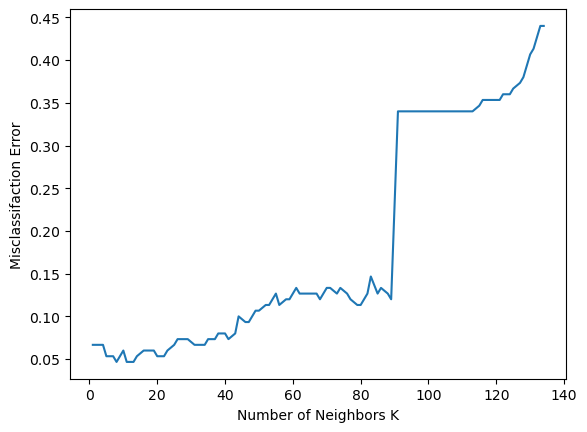

In [1]:
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
from sklearn import svm, datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier

#getting the data
iris = datasets.load_iris()
X=iris.data[:, :3]
y=iris.target

#plotting the data in 3d
colors = ['red', 'green', 'blue']
fig = plt.figure(figsize =(18,15))
ax = fig.add_subplot(111, projection = '3d')

for color, i, target in zip(colors, [0,1,2], iris.target_names):
    ax.scatter(X[y==i, 0], X[y==i, 1], X[y==i, 2], c=color, label=target)
    
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Scatter plot of Sepal width against Sepal length against Petal length')

#training the knn algorithm
k=7 #number of neighbors to consider
knn =KNeighborsClassifier(n_neighbors=k)
knn.fit(X,y)

#getting the max and min for x y and z to set up the mesh
x_min, x_max = X[:, 0].min()-1, X[:, 0].max() +1
y_min, y_max = X[:, 1].min()-1, X[:, 1].max() +1
z_min, z_max = X[:, 2].min()-1, X[:, 2].max() +1
h = (x_max/x_min)/10
xx,yy,zz = np.meshgrid(np.arange(x_min,x_max,h), 
                       np.arange(y_min,y_max,h),
                       np.arange(z_min,z_max,h))
#Q is the prediction
Q = knn.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Q = Q.reshape(xx.shape)
#can't figure out how to show this in 3d, figure out later
plt.show()

predictions = knn.predict(X)
print(np.unique(predictions, return_counts=True))

#doing cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = []
folds=10
#makes range of neighbors to try, accounts for the 1 fold that will be used for training
ks = list(range(1, int(len(X) * ((folds-1)/folds))))
#removing all multiples of 3
ks=[k for k in ks if k %3 != 0]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors = k)
    
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
    mean = scores.mean()
    cv_scores.append(mean)
    print(mean)

#finding lowest MSE
MSE = [1-x for x in cv_scores]
optimal_k = ks[MSE.index(min(MSE))]
print(f"The optimal number of neighbors is {optimal_k}")
plt.plot(ks, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassifaction Error')
plt.show()